## Importing the Dependncies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.datasets 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
!pip install XGBoost

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from xgboost import XGBRegressor

## Importing Boston House Price Dataset

In [4]:
house_price_data = pd.read_csv('BostonHousing.csv') 

In [5]:
house_price_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# cheking for missing value
house_price_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

## Correlation between various feature 

In [7]:
corr = house_price_data.corr()

<Axes: >

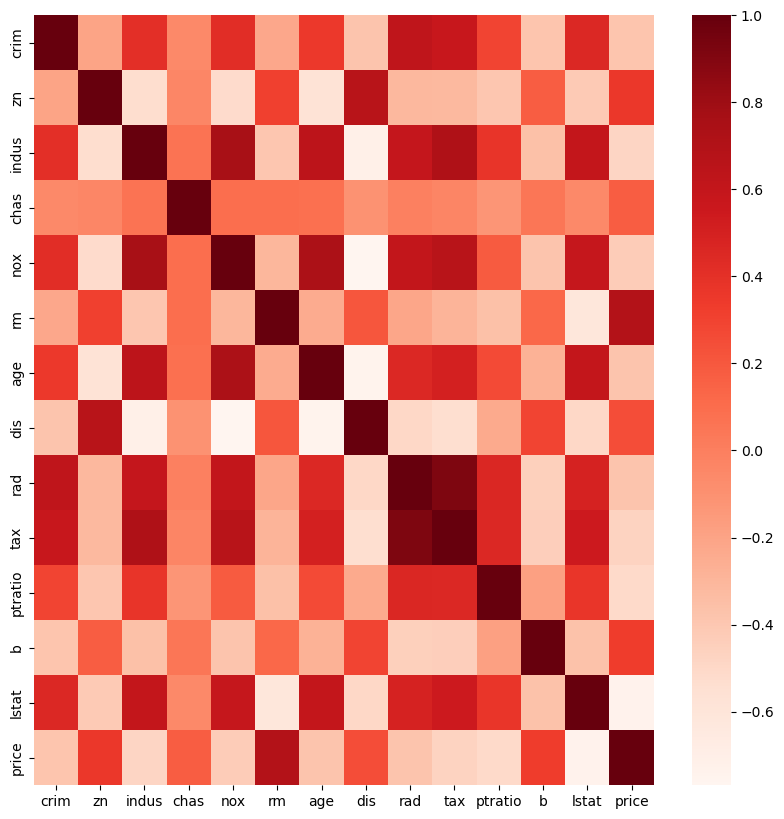

In [8]:
# constructing a heat map
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,annot_kws={'size':8},cmap='Reds')

## Splitting Data & Target 

In [9]:
x = house_price_data.drop(['price'],axis=1)
y = house_price_data['price']
print(x)
print('--------------------------------------------------------------------')
print(y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

## Train Test Split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(506, 13) (404, 13) (102, 13)


## Training The Model

In [11]:
XGBR = XGBRegressor()
XGBR.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Evaluation

In [25]:
# Accuracy score for prediction on training data
training_data_prediction = XGBR.predict(x_train)
# R Squared Error
score_2 =metrics.r2_score(y_train,training_data_prediction)
print('R Squared Error For Training Data : ',score_2)
print('----------------------------------------------')
# Mean Absolute Error
score_3 =metrics.mean_absolute_error(y_train,training_data_prediction) 
print('Mean Absolute Error For Training Data : ',score_3)

R Squared Error For Training Data :  0.9999948236320982
----------------------------------------------
Mean Absolute Error For Training Data :  0.0145848437110976


In [26]:
# Accuracy score for prediction on test data
test_data_prediction = XGBR.predict(x_test)
# R Squared Error
score_2 =metrics.r2_score(y_test,test_data_prediction)
print('R Squared Error For test Data : ',score_2)
print('----------------------------------------------')
# Mean Absolute Error
score_3 =metrics.mean_absolute_error(y_test,test_data_prediction) 
print('Mean Absolute Error For test Data : ',score_3)

R Squared Error For test Data :  0.8711660369151691
----------------------------------------------
Mean Absolute Error For test Data :  2.2834744154238233


## Visualizing the actuale prices and the predicted prices

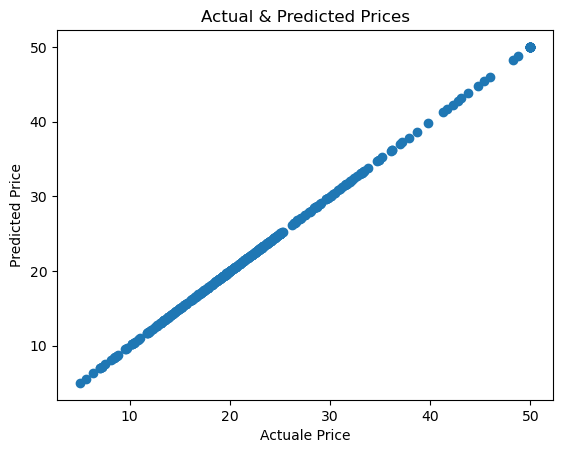

In [28]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actuale Price')
plt.ylabel('Predicted Price')
plt.title('Actual & Predicted Prices')
plt.show()